In [23]:
import os
import tensorflow as tf
if os.getenv("CUDA_VISIBLE_DEVICES") is None:
    gpu_num = 0 # Use "" to use the CPU
    os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_num}"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Import Sionna
try:
    import sionna
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna

# IPython "magic function" for inline plots
%matplotlib inline
import matplotlib.pyplot as plt
print(sionna.__version__)

0.15.1


In [13]:
batch_size = 1000 # Number of symbols we want to generate
num_bits_per_symbol = 4 # 16-QAM has four bits per symbol
b = sionna.utils.BinarySource(dtype=tf.float32)
results = b.call(inputs=[batch_size, num_bits_per_symbol])
results

<tf.Tensor: shape=(1000, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 1., 1., 0.],
       [1., 0., 1., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 1.],
       [1., 0., 1., 1.]], dtype=float32)>

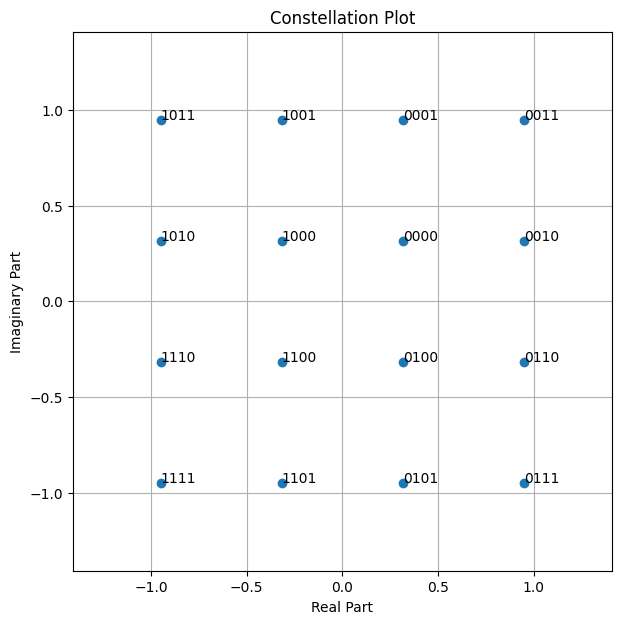

In [14]:
constellation = sionna.mapping.Constellation("qam", num_bits_per_symbol)
constellation.show()

In [16]:
mapper = sionna.mapping.Mapper(constellation_type="qam", num_bits_per_symbol=num_bits_per_symbol)
x = mapper(results)
x[:10]

<tf.Tensor: shape=(10, 1), dtype=complex64, numpy=
array([[ 0.3162278+0.3162278j],
       [ 0.9486833-0.3162278j],
       [-0.9486833+0.9486833j],
       [ 0.3162278+0.3162278j],
       [ 0.9486833+0.3162278j],
       [ 0.9486833+0.3162278j],
       [ 0.9486833+0.9486833j],
       [-0.3162278+0.9486833j],
       [-0.3162278-0.3162278j],
       [-0.9486833+0.9486833j]], dtype=complex64)>

In [20]:
# It seems like their code is broken, but that can't be the case
awgn = sionna.channel.AWGN(dtype=tf.complex64)
"""
ebno_db = 15
no = sionna.utils.ebnodb2no(ebno_db, num_bits_per_symbol, coderate=1)
y = awgn([x, no])
"""

AttributeError: 'AWGN' object has no attribute '_dtype'